In [52]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# We have two sets of data: Loan data for the year of 2019 (We will use this data set as our train data) to precict the credit risk for the loan data set of 2020's first quarter (This is going to be our test data set)! 

In [53]:
#Reading the data from csv files
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [54]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [55]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


# What data should be used to determine loan status?
- Loan Status

# Convert categorical data to numeric and separate target feature for training data


In [56]:
pd.get_dummies(train_df['loan_status'])

,high_risk,low_risk
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
12175,1,0
12176,1,0
12177,1,0
12178,1,0


In [57]:
pd.get_dummies(test_df['loan_status'])

,high_risk,low_risk
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4697,1,0
4698,1,0
4699,1,0
4700,1,0


In [58]:
# Drop the label to create the X_train_dummies data
X_train_dummies = pd.get_dummies(train_df.drop(['loan_status'], axis = 1), drop_first = True)
X_train_dummies

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,170200.0,1,0,0,0,0,1,0,0,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,35398.0,1,0,0,1,0,1,0,0,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,90340.0,1,0,0,1,0,1,0,0,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,15406.0,0,0,1,0,0,1,0,0,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,58778.0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,...,19055.0,0,0,1,0,0,1,0,0,0
12176,354944,354944,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,...,54824.0,0,0,1,0,1,1,0,0,0
12177,354973,354973,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,...,53065.0,0,0,1,0,0,1,0,0,0
12178,355002,355002,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,...,32930.0,1,0,0,1,0,1,1,0,0


In [59]:
# Drop the label to create the X_test_dummies data
X_test_dummies = pd.get_dummies(test_df.drop(['loan_status'], axis = 1), drop_first = True)
X_test_dummies

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_bc_limit,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_Joint App,hardship_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,74600.0,99475.0,1,0,0,0,0,1,0,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,5900.0,23628.0,0,0,1,0,0,1,0,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,7300.0,15000.0,0,0,1,0,0,1,0,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,13800.0,35981.0,0,0,1,0,0,1,0,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,21000.0,24977.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,...,48400.0,107388.0,0,0,1,1,0,0,0,0
4698,77291,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,...,13300.0,30775.0,0,0,1,0,0,1,0,0
4699,77292,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,...,8500.0,29550.0,0,0,1,0,1,0,0,0
4700,77297,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,...,1500.0,9657.0,0,0,1,1,0,1,0,0


In [60]:
# Adding the missing dummies values back to the testing data set, assigning it to zero. We do this in order to get the same shape of columns for both train and test dummies. 
for col in X_train_dummies.columns:
    if col not in X_test_dummies.columns:
        X_test_dummies[col] = 0

In [61]:
X_test_dummies

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,99475.0,1,0,0,0,0,1,0,0,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,23628.0,0,0,1,0,0,1,0,0,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,15000.0,0,0,1,0,0,1,0,0,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,35981.0,0,0,1,0,0,1,0,0,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,24977.0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,...,107388.0,0,0,1,1,0,0,0,0,0
4698,77291,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,...,30775.0,0,0,1,0,0,1,0,0,0
4699,77292,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,...,29550.0,0,0,1,0,1,0,0,0,0
4700,77297,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,...,9657.0,0,0,1,1,0,1,0,0,0


In [62]:
# Converting output labels to 0 and 1
y_train_label = LabelEncoder().fit_transform(train_df['loan_status'])
y_train_label

array([1, 1, 1, ..., 0, 0, 0])

In [63]:
y_test_label = LabelEncoder().fit_transform(test_df['loan_status'])
y_test_label

array([1, 1, 1, ..., 0, 0, 0])

In [64]:
len(y_train_label)

12180

In [65]:
len(y_test_label)

4702

# Which model will do a better prediction: Logistic Regression or Random Forest?

# Logestic Regression Model 

In [66]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression
classifier_LRM = LogisticRegression()
classifier_LRM
classifier_LRM.fit(X_train_dummies, y_train_label)
print(f"Training Data Score: {classifier_LRM.score(X_train_dummies, y_train_label)}")
print(f"Testing Data Score: {classifier_LRM.score(X_test_dummies, y_test_label)}")

Training Data Score: 0.6497536945812807
Testing Data Score: 0.5204168438962143


C:\Users\makba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test_label
y_pred = classifier_LRM.predict(X_test_dummies)
print(classification_report(y_true, y_pred, target_names =['high_risk', 'low_risk']))

              precision    recall  f1-score   support

   high_risk       0.55      0.22      0.31      2351
    low_risk       0.51      0.83      0.63      2351

    accuracy                           0.52      4702
   macro avg       0.53      0.52      0.47      4702
weighted avg       0.53      0.52      0.47      4702



In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.5204168438962143

# Random Forest Model 

In [69]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
classifier_RFM = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_dummies, y_train_label)
print(f'Training Score: {classifier_RFM.score(X_train_dummies, y_train_label)}')
print(f'Testing Score: {classifier_RFM.score(X_test_dummies, y_test_label)}')

Training Score: 1.0
Testing Score: 0.635048915355168


In [70]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test_label
y_pred = classifier_RFM.predict(X_test_dummies)
print(classification_report(y_true, y_pred, target_names =['high_risk', 'low_risk']))

              precision    recall  f1-score   support

   high_risk       0.78      0.37      0.51      2351
    low_risk       0.59      0.90      0.71      2351

    accuracy                           0.64      4702
   macro avg       0.69      0.64      0.61      4702
weighted avg       0.69      0.64      0.61      4702



In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.635048915355168

# Scaling process to see if there is an impact to our both models: Logistic Regression & Random Forest

In [72]:
# Scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train_dummies)
X_train_scaled = scaler.transform(X_train_dummies)
X_test_scaled = scaler.transform(X_test_dummies)
X_train_scaled

array([[-1.31172014, -1.31172014, -0.39311205, ..., -0.41370744,
        -0.17149859, -0.02026518],
       [-0.46579523, -0.46579523,  0.35168119, ..., -0.41370744,
        -0.17149859, -0.02026518],
       [ 1.3364188 ,  1.3364188 ,  0.25400339, ..., -0.41370744,
        -0.17149859, -0.02026518],
       ...,
       [ 1.67571549,  1.67571549, -1.34791257, ..., -0.41370744,
        -0.17149859, -0.02026518],
       [ 1.67600634,  1.67600634, -0.23438563, ...,  2.41716707,
        -0.17149859, -0.02026518],
       [ 1.67906533,  1.67906533, -0.23438563, ..., -0.41370744,
        -0.17149859, -0.02026518]])

# Scaled Logestic Regression Model 

In [73]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier_scaler_LRM = LogisticRegression()
classifier_scaler_LRM
classifier_scaler_LRM.fit(X_train_scaled, y_train_label)
print(f"Training Data Score: {classifier_scaler_LRM.score(X_train_scaled, y_train_label)}")
print(f"Testing Data Score: {classifier_scaler_LRM.score(X_test_scaled, y_test_label)}")

Training Data Score: 0.713136288998358
Testing Data Score: 0.7233092301148447


C:\Users\makba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test_label
y_pred = classifier_scaler_LRM.predict(X_test_scaled)
print(classification_report(y_true, y_pred, target_names =['high_risk', 'low_risk']))

              precision    recall  f1-score   support

   high_risk       0.86      0.53      0.66      2351
    low_risk       0.66      0.91      0.77      2351

    accuracy                           0.72      4702
   macro avg       0.76      0.72      0.71      4702
weighted avg       0.76      0.72      0.71      4702



In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.7233092301148447

# Scaled Random Forest Model 

In [76]:
# Train a Random Forest Classifier model on the scaled data and print the model score
classifier_scaler_RFM = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train_label)
print(f'Training Score: {classifier_scaler_RFM.score(X_train_scaled, y_train_label)}')
print(f'Testing Score: {classifier_scaler_RFM.score(X_test_scaled, y_test_label)}')

Training Score: 1.0
Testing Score: 0.6335601871544024


In [77]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test_label
y_pred = classifier_scaler_RFM.predict(X_test_scaled)
print(classification_report(y_true, y_pred, target_names =['high_risk', 'low_risk']))

              precision    recall  f1-score   support

   high_risk       0.78      0.37      0.50      2351
    low_risk       0.59      0.89      0.71      2351

    accuracy                           0.63      4702
   macro avg       0.68      0.63      0.61      4702
weighted avg       0.68      0.63      0.61      4702



In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.6335601871544024

[4.07813213e-02 4.08154224e-02 1.65068792e-02 3.14936543e-02
 3.21780308e-02 1.29374306e-02 1.41663354e-02 2.60373504e-03
 3.64324165e-03 7.91006432e-03 1.29795363e-03 1.36150723e-02
 1.04075449e-02 3.13393582e-02 3.14270086e-02 4.09416778e-02
 3.99819914e-02 5.48160741e-02 3.86257717e-02 1.55085916e-02
 0.00000000e+00 0.00000000e+00 9.08219350e-02 6.65965577e-04
 0.00000000e+00 6.13141610e-06 4.11573070e-03 1.21377636e-02
 4.24966077e-03 5.89250208e-03 3.62169193e-03 5.42137515e-03
 1.06307147e-02 1.19840487e-02 1.24509536e-02 4.45423349e-03
 6.66831976e-03 1.52528053e-02 1.15545192e-02 1.40116951e-02
 5.65830805e-03 5.88971877e-03 7.08655345e-03 8.55891247e-03
 1.29626460e-02 1.40301986e-02 1.28861519e-02 2.40681041e-04
 1.24461954e-06 1.44940078e-02 1.51791923e-02 1.08084216e-02
 9.05162183e-03 5.05169744e-03 1.23033862e-02 1.05859355e-02
 3.08578321e-03 6.07582173e-03 7.13902555e-03 6.45880672e-03
 8.16249077e-03 9.70829287e-03 7.67766184e-03 8.96632941e-03
 7.02621444e-03 7.769092

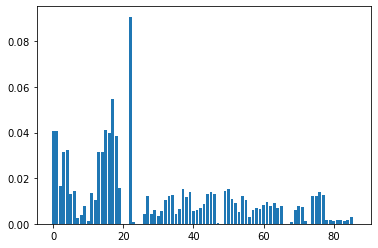

In [79]:
%matplotlib inline
from matplotlib import pyplot as plt
features = classifier_scaler_RFM.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

# Conclusion (Comparing results)
By looking at the scoring results from both models (Linear Regression Model vs Random Forest Model) it seems that RFM is predictiong better than LRM (52% LRM vs 64% RFM) but after scaling processing, we notice that the is a pretty good improvment for LRM ( 52% ---> 72%) but  there is not any improvement for RFM (64% ---> 63%). 

So scalling has no impact for the Random FOrest Model(RFM) scoring but pretty a good impact on Linear Regression Model (LRM) .